<a href="https://colab.research.google.com/github/Guhan2348519/demo/blob/main/2348519_DAA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

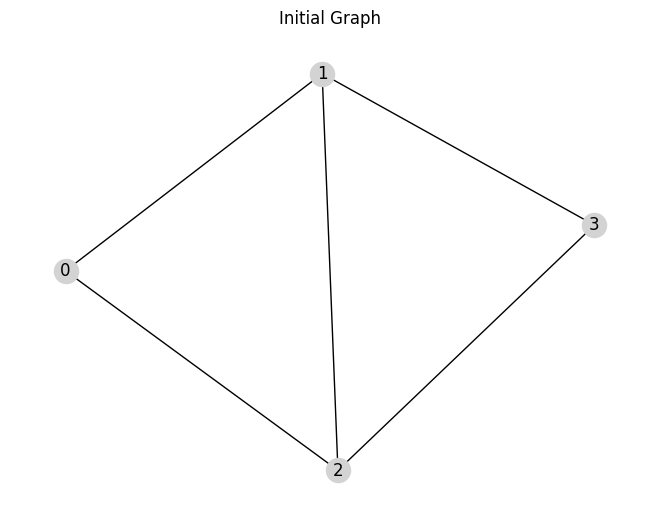

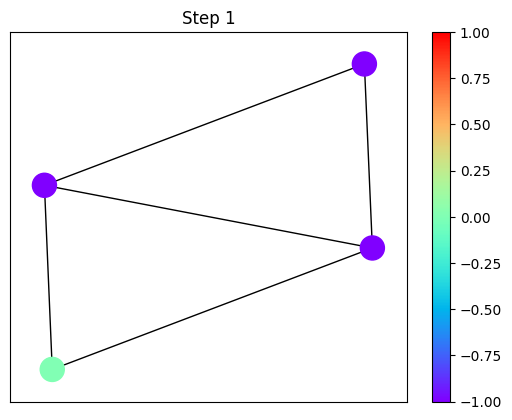

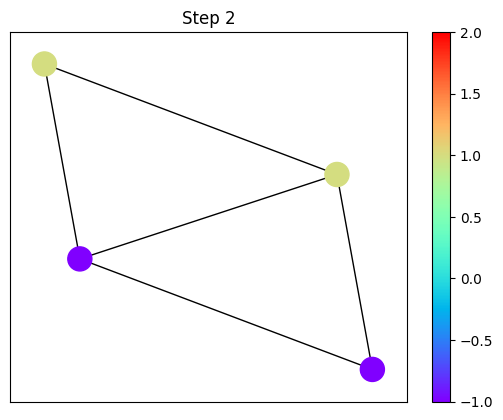

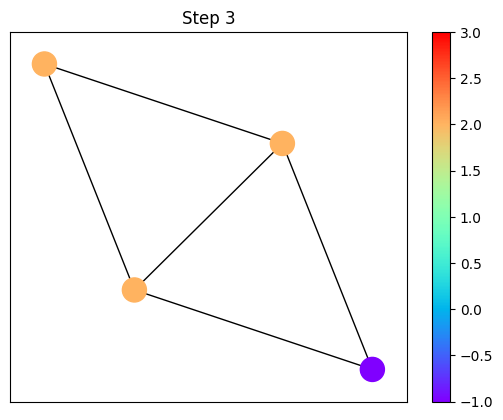

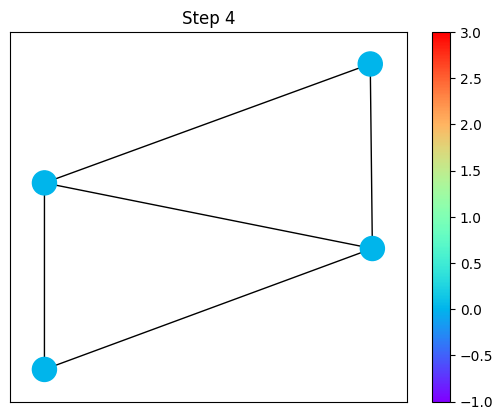

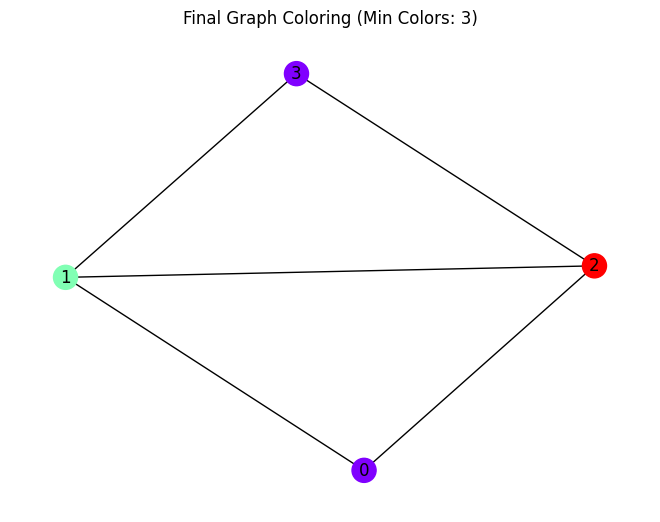

Minimum Colors Required: 3
Final Color Assignment:
Vertex 0: Color 0
Vertex 1: Color 1
Vertex 2: Color 2
Vertex 3: Color 0


In [21]:

import networkx as nx
import matplotlib.pyplot as plt

def is_safe(graph, node, color, c):
    """
    Check if it's safe to assign color c to the given node.
    """
    for neighbor in graph.neighbors(node):
        if color[neighbor] == c:
            return False
    return True

def visualize_initial_graph(graph):
    """
    Visualize the initial graph before coloring.
    """
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightgray', cmap=plt.cm.rainbow)
    plt.title("Initial Graph")
    plt.show()

def visualize_step(graph, color_assignment, node):
    """
    Update the visualization to show the current coloring at each step.
    """
    node_colors = [color_assignment[node] if i <= node else -1 for i in range(len(graph.nodes))]
    pos = nx.spring_layout(graph)
    cmap = plt.cm.rainbow
    vmin, vmax = -1, max(color_assignment) + 1

    nodes = nx.draw_networkx_nodes(graph, pos, node_color=node_colors, cmap=cmap, vmin=vmin, vmax=vmax)
    edges = nx.draw_networkx_edges(graph, pos)
    plt.title(f"Step {node + 1}")
    plt.colorbar(nodes)
    plt.show()

def graph_coloring_util(graph, num_vertices, color_assignment, min_colors, node):
    """
    Recursive utility function to explore different color assignments using backtracking.
    """
    if node == num_vertices:
        # All nodes are colored, update the minimum number of colors
        min_colors[0] = min(min_colors[0], max(color_assignment) + 1)
        return True

    for c in range(min_colors[0]):
        if is_safe(graph, node, color_assignment, c):
            color_assignment[node] = c
            visualize_step(graph, color_assignment, node)
            if graph_coloring_util(graph, num_vertices, color_assignment, min_colors, node + 1):
                return True
            color_assignment[node] = -1

    return False

def graph_coloring_algorithm(graph):
    """
    Execute the graph coloring algorithm and visualize the result.
    """
    num_vertices = len(graph.nodes)
    color_assignment = [-1] * num_vertices
    min_colors = [num_vertices]

    visualize_initial_graph(graph)

    if not graph_coloring_util(graph, num_vertices, color_assignment, min_colors, 0):
        print("Solution does not exist.")
        return

    # Visualization of the final result
    node_colors = [color_assignment[node] for node in graph.nodes]
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.rainbow)
    plt.title(f"Final Graph Coloring (Min Colors: {min_colors[0]})")
    plt.show()

    # Display minimum number of colors and final color assignment
    print(f"Minimum Colors Required: {min_colors[0]}")
    print("Final Color Assignment:")
    for node, color in enumerate(color_assignment):
        print(f"Vertex {node}: Color {color}")

# Example usage:
G = nx.Graph()
G.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])

graph_coloring_algorithm(G)